In [307]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [308]:
df = pd.read_csv('../data/fuoriuscita/vittime_1522/Vittime, denuncia e motivo del ritiro (2013-2022).csv')
df = df[["SEXISTAT1", "TITOLO_STUDIO", "DENUNCIA", "Denuncia e motivo del ritiro", "TIME", "Value"]]
df.head()

,SEXISTAT1,TITOLO_STUDIO,DENUNCIA,Denuncia e motivo del ritiro,TIME,Value
0,M,ALL,NOREPORT,non denuncia,2013,702
1,M,ALL,NOREPORT,non denuncia,2014,276
2,M,ALL,NOREPORT,non denuncia,2015,210
3,M,ALL,NOREPORT,non denuncia,2016,211
4,M,ALL,NOREPORT,non denuncia,2017,183


In [309]:
df_filtered = df[(df["SEXISTAT1"] == "F") 
                 & (df["TITOLO_STUDIO"] == "ALL")
                 & (df["DENUNCIA"] != "ALL")
                 & (df["Denuncia e motivo del ritiro"] != "non risponde")
                 & (df["Denuncia e motivo del ritiro"] != "non disponibile")][["DENUNCIA", "Denuncia e motivo del ritiro", "TIME", "Value"]]
df_filtered.head()

,DENUNCIA,Denuncia e motivo del ritiro,TIME,Value
10,NOREPORT,non denuncia,2013,9203
11,NOREPORT,non denuncia,2014,7232
12,NOREPORT,non denuncia,2015,5710
13,NOREPORT,non denuncia,2016,5728
14,NOREPORT,non denuncia,2017,5535


In [310]:
df_filtered_2022 = df_filtered[df_filtered["TIME"] == 2022][["DENUNCIA", "Denuncia e motivo del ritiro", "Value"]]
df_filtered_2022.head()

,DENUNCIA,Denuncia e motivo del ritiro,Value
19,NOREPORT,non denuncia,8056
100,NOREP_POLICE,le Forze dell'Ordine invitano a non fare denuncia,235
180,NOREP_RETURN,ritorno dal maltrattante,202
251,NOREP_PREVIOUS,precedenti denunce senza esiti positivi,8
314,NOREP_FEAR,paura,896


In [311]:
df_filtered_2022 = df_filtered_2022.set_index('Denuncia e motivo del ritiro').sort_index()
df_filtered_2022

,DENUNCIA,Value
Denuncia e motivo del ritiro,,
altro,WITHDR_OTHER,33
altro,NOREP_OTHER,1942
denuncia,REPORT,1500
le Forze dell'Ordine invitano a non fare denuncia,NOREP_POLICE,235
le Forze dell'Ordine invitano a ritirare la denuncia,WITHDR_POLICE,10
mancata fiducia nelle Forze dell'Ordine,WITHDR_DISTRUST,1
mancata fiducia nelle Forze dell'Ordine,NOREP_DISTRUST,154
nessun posto sicuro dove andare,WITHDR_SAFE,17
nessun posto sicuro dove andare,NOREP_SAFE,577


In [312]:
df_generic = df_filtered_2022[(df_filtered_2022["DENUNCIA"] == "REPORT")
                                            | (df_filtered_2022["DENUNCIA"] == "NOREPORT")
                                            | (df_filtered_2022["DENUNCIA"] == "WITHDR_COMP")]
df_generic

,DENUNCIA,Value
Denuncia e motivo del ritiro,,
denuncia,REPORT,1500
non denuncia,NOREPORT,8056
ritira la denuncia,WITHDR_COMP,318


In [313]:
df_ritira = df_filtered_2022[(df_filtered_2022["DENUNCIA"].str.startswith("WITH"))
                                           & ((df_filtered_2022["DENUNCIA"] != "WITHDR_COMP"))]
df_non_denuncia = df_filtered_2022[(df_filtered_2022["DENUNCIA"].str.startswith("NO"))
                                                 & (df_filtered_2022["DENUNCIA"] != "NOREPORT")]

df_non_denuncia

,DENUNCIA,Value
Denuncia e motivo del ritiro,,
altro,NOREP_OTHER,1942
le Forze dell'Ordine invitano a non fare denuncia,NOREP_POLICE,235
mancata fiducia nelle Forze dell'Ordine,NOREP_DISTRUST,154
nessun posto sicuro dove andare,NOREP_SAFE,577
paura,NOREP_FEAR,896
paura del violento,NOREP_PERPET,1605
precedenti denunce senza esiti positivi,NOREP_PREVIOUS,8
ritorno dal maltrattante,NOREP_RETURN,202
timore del giudizio dei propri familiari,NOREP_JUDGED,173


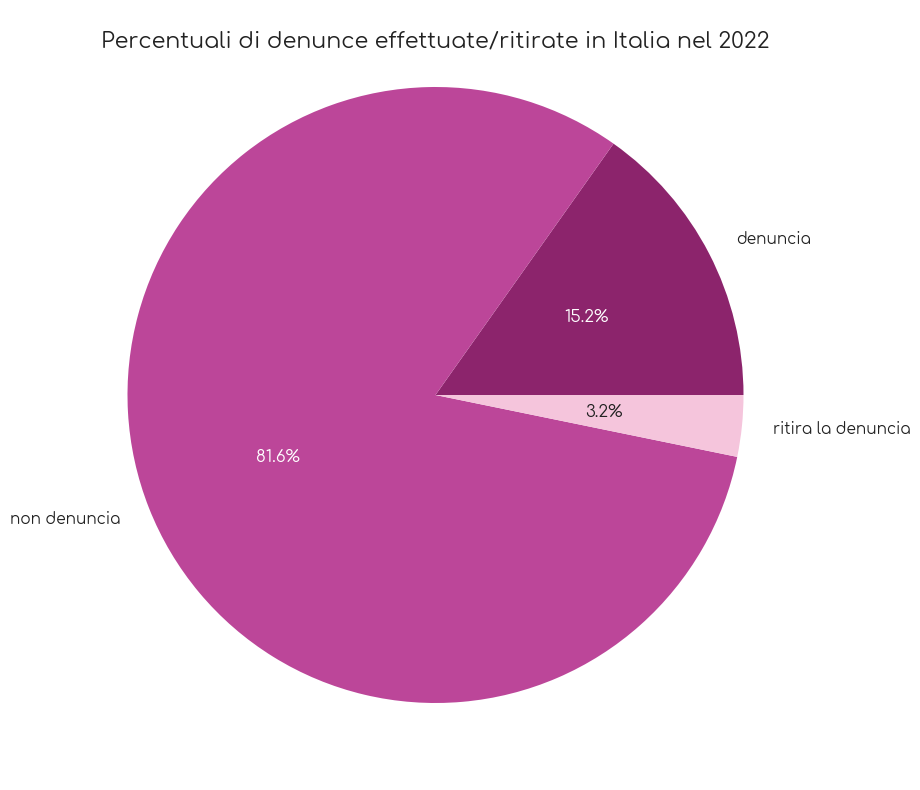

In [314]:
fig, ax = plt.subplots()

def func(pct):
    return f"{pct:.1f}%"

patches, texts, autotexts = plt.pie(df_generic["Value"],
        labels=df_generic.index,
        colors=["#8C246C","#BC4699", "#F5C5DC"],
        autopct=lambda pct: func(pct), pctdistance=0.55,) # denuncia, non denuncia, ritira

for autotext in autotexts:
    autotext.set_size(12)

for text in texts:
    text.set_size(11)

autotexts[0].set_color('white')
autotexts[1].set_color('white')

plt.title("Percentuali di denunce effettuate/ritirate in Italia nel 2022", y=0.94)
plt.show()

In [315]:
df_generic

,DENUNCIA,Value
Denuncia e motivo del ritiro,,
denuncia,REPORT,1500
non denuncia,NOREPORT,8056
ritira la denuncia,WITHDR_COMP,318


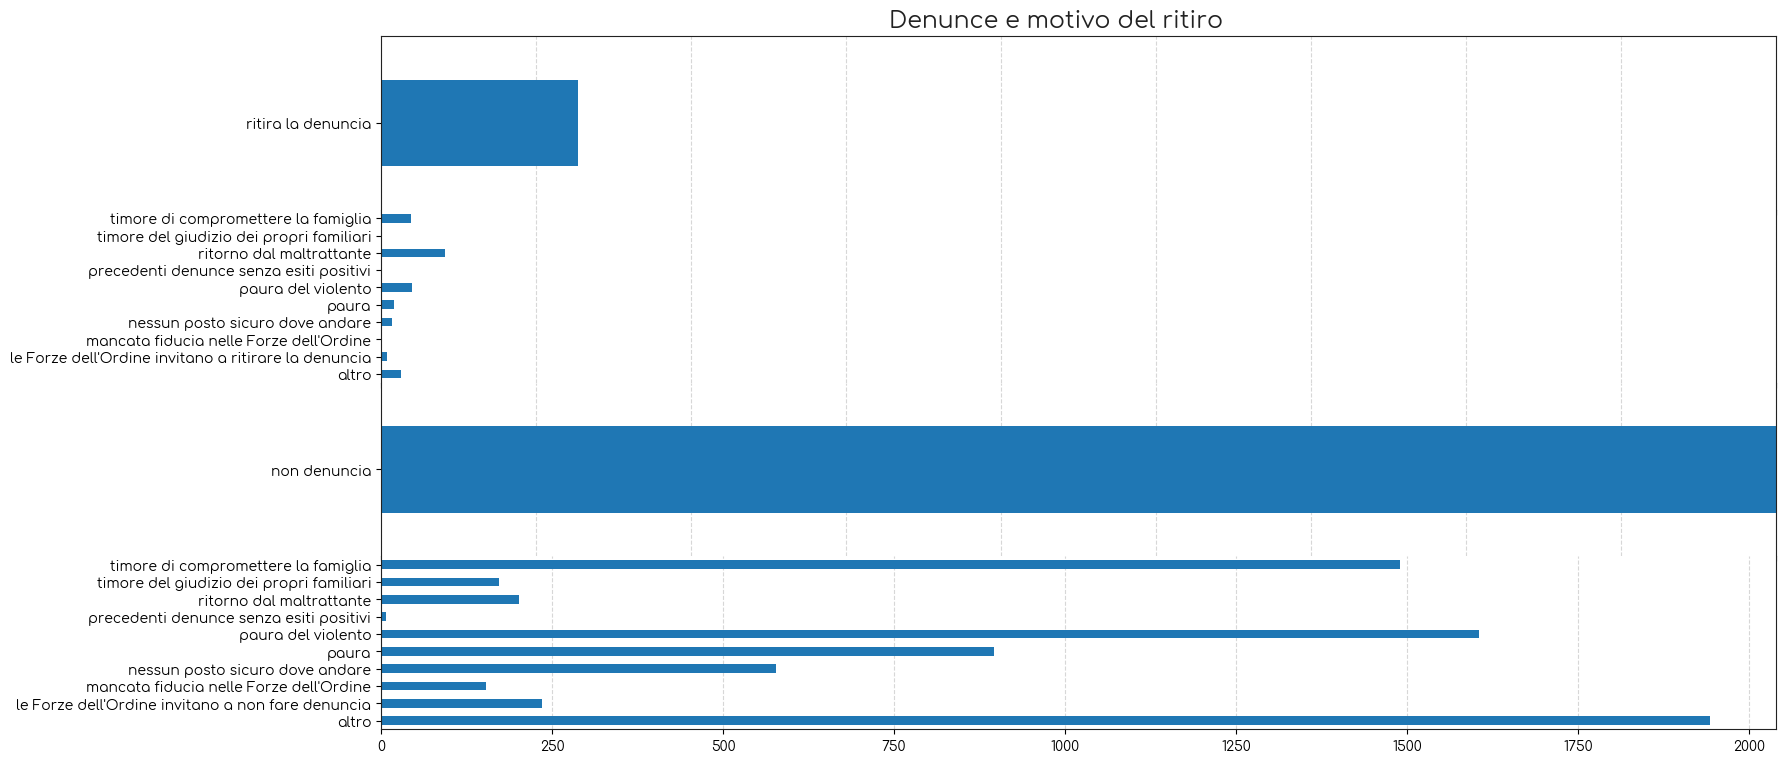

In [325]:
fig, axes = plt.subplots(nrows=4, figsize=(18,9))

df_generic[df_generic["DENUNCIA"]=="WITHDR_COMP"].plot.barh(ax=axes[0])
df_ritira.plot.barh(ax=axes[1])
df_generic[df_generic["DENUNCIA"]=="NOREPORT"].plot.barh(ax=axes[2])
df_non_denuncia.plot.barh(ax=axes[3])

axes[0].set_xlim(xmax=axes[3].get_xlim()[1])
axes[1].set_xlim(xmax=axes[3].get_xlim()[1])
axes[2].set_xlim(xmax=axes[3].get_xlim()[1])
axes[3].set_xlim(xmax=axes[3].get_xlim()[1])

# axes[1].set_title("Ritira la denuncia")
# axes[3].set_title("Non denuncia")

axes[0].legend('', frameon=False)
axes[1].legend('', frameon=False)
axes[2].legend('', frameon=False)
axes[3].legend('', frameon=False)

axes[0].spines.bottom.set_visible(False)
axes[1].spines.bottom.set_visible(False)
axes[2].spines.bottom.set_visible(False)

axes[0].spines.top.set_visible(True)

axes[0].spines.right.set_visible(True)
axes[1].spines.right.set_visible(True)
axes[2].spines.right.set_visible(True)
axes[3].spines.right.set_visible(True)

xticks0 = axes[0].get_xticks()
xticks1 = axes[1].get_xticks()
xticks2 = axes[2].get_xticks()

axes[0].set_xticks(xticks0, labels=[])
axes[1].set_xticks(xticks1, labels=[])
axes[2].set_xticks(xticks2, labels=[])

axes[0].xaxis.grid(True)
axes[1].xaxis.grid(True)
axes[2].xaxis.grid(True)
axes[3].xaxis.grid(True)

axes[0].set_ylabel("")
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[3].set_ylabel("")

fig.subplots_adjust(hspace=0)

fig.suptitle("Denunce e motivo del ritiro", y=0.91, size=17)
plt.show()